In [1]:
# Import libraries to read the dataset and for understanding or handle the dataset.

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('census_income.csv')

In [4]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# most of the columns are not in integer form as we seeing in dataset

# we have to process all these columns with encoding technique

In [6]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
# there are no null values present in dataset

In [9]:
# check for each column type, object or integer

In [10]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [11]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
# we will check all columns values and will also start encoding

# for some columns we will use label encoder and for some columns we will use ordinal encoder

In [13]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lab_enc = LabelEncoder()

In [16]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
df['Workclass'] = lab_enc.fit_transform(df['Workclass'])

In [18]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [19]:
ord_enc = OrdinalEncoder(categories=[[' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' HS-grad',' 11th',' 12th',' Bachelors',' Masters',' Some-college',' Doctorate',' Assoc-acdm',' Assoc-voc',' Prof-school']])

df['Education'] = ord_enc.fit_transform(df[['Education']])

In [20]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [21]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [22]:
df['Marital_status'] = lab_enc.fit_transform(df['Marital_status'])

In [23]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [24]:
df['Occupation'] = lab_enc.fit_transform(df['Occupation'])

In [25]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [26]:
ord_enc = OrdinalEncoder(categories=[[' Other-relative',' Not-in-family',' Unmarried',' Own-child',' Wife',' Husband']])

df['Relationship'] = ord_enc.fit_transform(df[['Relationship']])

In [27]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [28]:
df['Race'] = lab_enc.fit_transform(df['Race'])

In [29]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [30]:
df['Sex'] = lab_enc.fit_transform(df['Sex'])

In [31]:
df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [32]:
df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [33]:
df['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [34]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [35]:
df['Native_country'] = lab_enc.fit_transform(df['Native_country'])

In [36]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [37]:
# after encoding selected columns let's have a look on the dataset

In [38]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9.0,13,2,4,5.0,4,1,0,0,13,39,<=50K
1,38,4,215646,6.0,9,0,6,1.0,4,1,0,0,40,39,<=50K
2,53,4,234721,7.0,7,2,6,5.0,2,1,0,0,40,39,<=50K
3,28,4,338409,9.0,13,2,10,4.0,2,0,0,0,40,5,<=50K
4,37,4,284582,10.0,14,2,4,4.0,4,0,0,0,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,13.0,12,2,13,4.0,4,0,0,0,38,39,<=50K
32556,40,4,154374,6.0,9,2,7,5.0,4,1,0,0,40,39,>50K
32557,58,4,151910,6.0,9,6,1,2.0,4,0,0,0,40,39,<=50K
32558,22,4,201490,6.0,9,4,1,3.0,4,1,0,0,20,39,<=50K


In [39]:
# now import libraries for visualization 

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
X = df.drop(columns=['Income'])

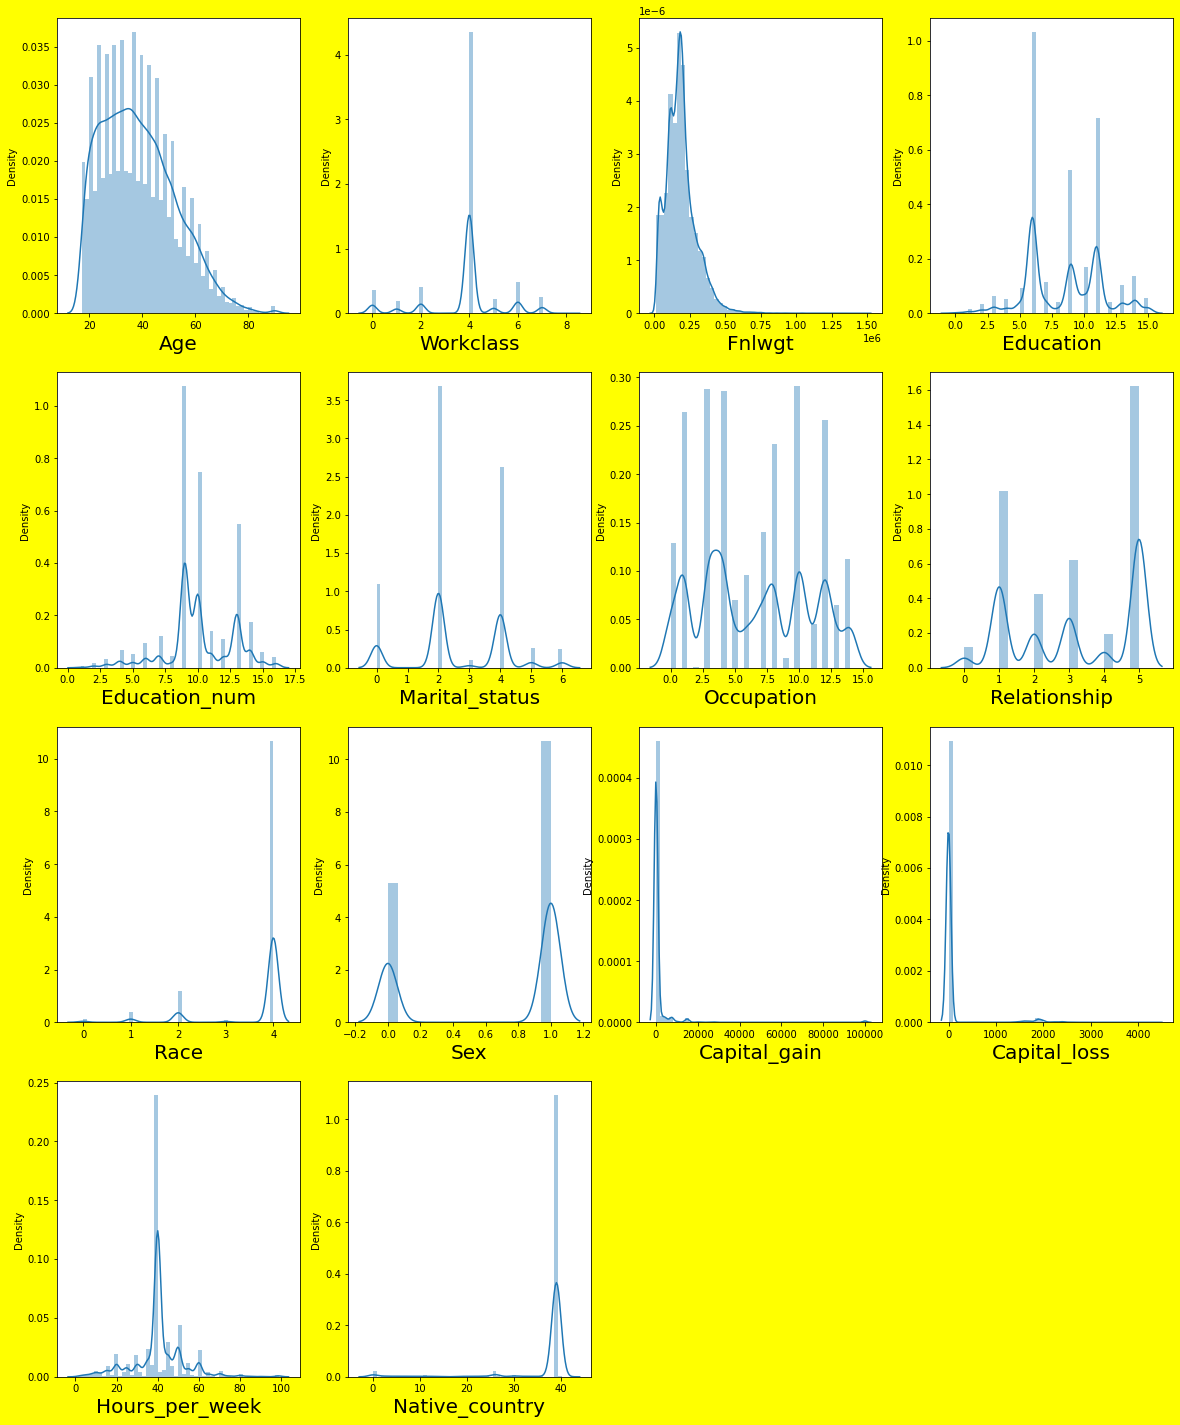

In [42]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [43]:
# as we saw in dataset outliers are present in dataset

In [44]:
# boxplot drawn for outliers

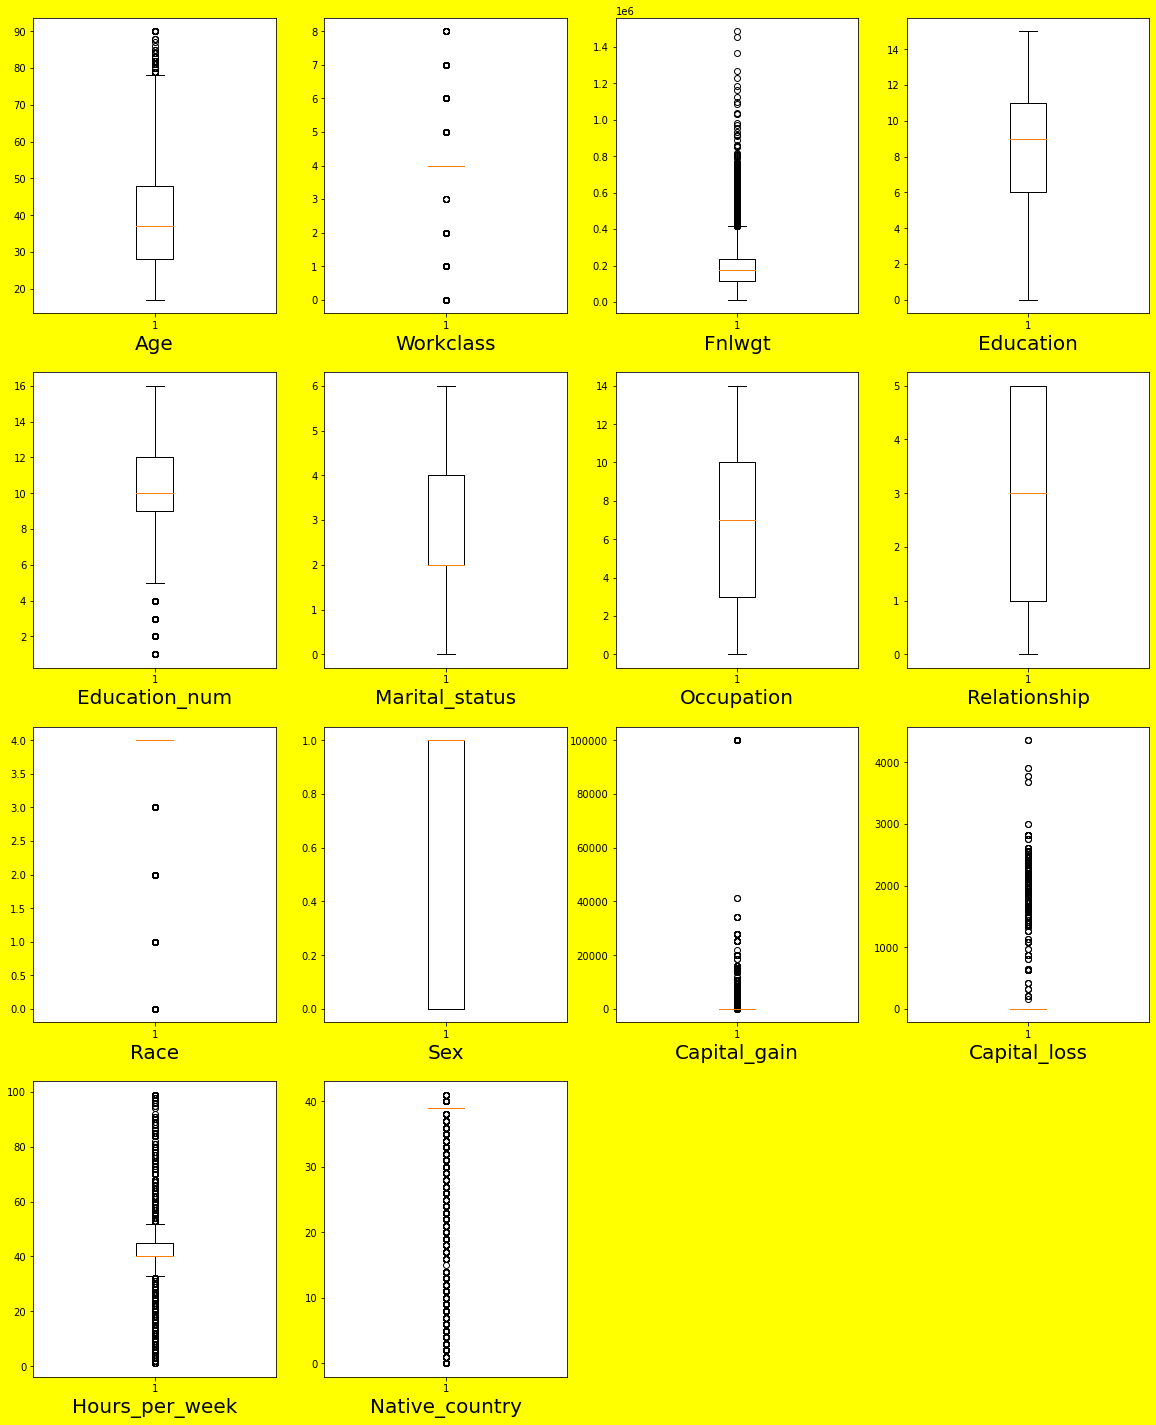

In [45]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        plt.boxplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [46]:
# clearly outliers are shown by boxplot

In [47]:
# finding q1,q3,iqr

In [48]:
q1 = df.quantile(0.25)

In [49]:
q3 = df.quantile(0.75)

In [50]:
iqr = q3 - q1

In [51]:
print(q1)

Age                   28.0
Workclass              4.0
Fnlwgt            117831.5
Education              6.0
Education_num          9.0
Marital_status         2.0
Occupation             3.0
Relationship           1.0
Race                   4.0
Sex                    0.0
Capital_gain           0.0
Capital_loss           0.0
Hours_per_week        40.0
Native_country        39.0
Name: 0.25, dtype: float64


In [52]:
print(q3)

Age                   48.0
Workclass              4.0
Fnlwgt            237054.5
Education             11.0
Education_num         12.0
Marital_status         4.0
Occupation            10.0
Relationship           5.0
Race                   4.0
Sex                    1.0
Capital_gain           0.0
Capital_loss           0.0
Hours_per_week        45.0
Native_country        39.0
Name: 0.75, dtype: float64


In [53]:
print(iqr)

Age                   20.0
Workclass              0.0
Fnlwgt            119223.0
Education              5.0
Education_num          3.0
Marital_status         2.0
Occupation             7.0
Relationship           4.0
Race                   0.0
Sex                    1.0
Capital_gain           0.0
Capital_loss           0.0
Hours_per_week         5.0
Native_country         0.0
dtype: float64


In [54]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [55]:
# now start checking outliers in all columns except target column

In [56]:
age_high = (q3.Age + (1.5 * iqr.Age))
age_high

78.0

In [57]:
index = np.where(df['Age'] > age_high)
index

(array([   73,   221,   429,   917,  1039,  1167,  1934,  2302,  2753,
         2890,  2905,  3210,  3337,  3536,  3776,  3962,  4069,  4108,
         4719,  4833,  5103,  5271,  5290,  5369,  5405,  5999,  6172,
         6213,  6231,  6438,  6623,  6747,  7480,  7719,  7871,  8175,
         8380,  8430,  8521,  8693,  8805,  8962,  8972,  9470, 10123,
        10209, 10544, 11098, 11237, 11511, 11531, 11730, 11995, 12450,
        12491, 12829, 12974, 13024, 13025, 13294, 13695, 13927, 14103,
        14158, 14603, 14710, 14755, 14902, 15355, 15661, 15891, 16301,
        16522, 16761, 16900, 17608, 18036, 18140, 18271, 18276, 18412,
        18559, 18724, 18831, 19044, 19171, 19179, 19211, 19488, 19494,
        19514, 19688, 19746, 19827, 20248, 20420, 20462, 20481, 20482,
        20609, 20825, 20879, 20952, 21342, 21500, 21811, 21834, 22219,
        22480, 22894, 22897, 23458, 23899, 24026, 24042, 24237, 24279,
        24394, 24559, 25162, 25302, 25396, 26011, 26241, 26730, 27794,
      

In [58]:
df = df.drop(df.index[index])

In [59]:
df.shape

(32417, 15)

In [60]:
age_low = (q1.Age - (1.5 * iqr.Age))
age_low

-2.0

In [61]:
index = np.where(df['Age'] < age_low)
index

(array([], dtype=int64),)

In [62]:
wr_high = (q3.Workclass + (1.5 * iqr.Workclass))
wr_high

4.0

In [63]:
index = np.where(df['Workclass'] > wr_high)
index

(array([    0,     6,    10, ..., 32405, 32406, 32416], dtype=int64),)

In [64]:
df = df.drop(df.index[index])

In [65]:
df.shape

(27484, 15)

In [66]:
wr_low = (q1.Workclass - (1.5 * iqr.Workclass))
wr_low

4.0

In [67]:
index = np.where(df['Workclass'] < wr_low)
index

(array([   16,    19,    21, ..., 27469, 27470, 27472], dtype=int64),)

In [68]:
df = df.drop(df.index[index])

In [69]:
df.shape

(22634, 15)

In [70]:
fn_high = (q3.Fnlwgt + (1.5 * iqr.Fnlwgt))
fn_high

415889.0

In [71]:
index = np.where(df['Fnlwgt'] > fn_high)
index

(array([   25,    27,    55,    75,   118,   121,   125,   144,   154,
          186,   220,   255,   277,   281,   289,   391,   427,   447,
          474,   570,   575,   633,   655,   669,   704,   794,   816,
          823,   851,   885,   893,   902,   928,   942,   946,   987,
          995,  1031,  1090,  1112,  1128,  1135,  1146,  1203,  1243,
         1261,  1277,  1353,  1366,  1392,  1404,  1425,  1463,  1508,
         1558,  1595,  1612,  1618,  1627,  1647,  1693,  1719,  1732,
         1761,  1832,  1894,  1897,  1938,  1939,  1954,  1967,  1986,
         2010,  2015,  2017,  2040,  2073,  2150,  2178,  2179,  2206,
         2219,  2239,  2251,  2335,  2347,  2367,  2381,  2403,  2447,
         2449,  2543,  2565,  2603,  2651,  2668,  2701,  2714,  2784,
         2804,  2809,  2816,  2830,  2855,  2876,  2906,  2935,  2937,
         2952,  2966,  3017,  3041,  3061,  3079,  3126,  3143,  3232,
         3289,  3311,  3407,  3412,  3436,  3440,  3454,  3602,  3651,
      

In [72]:
df = df.drop(df.index[index])

In [73]:
df.shape

(21903, 15)

In [74]:
fn_low = (q1.Fnlwgt - (1.5 * iqr.Fnlwgt))
fn_low

-61003.0

In [75]:
index = np.where(df['Fnlwgt'] < fn_low)
index

(array([], dtype=int64),)

In [76]:
edu_high = (q3.Education + (1.5 * iqr.Education))
edu_high

18.5

In [77]:
index = np.where(df['Education'] > edu_high)
index

(array([], dtype=int64),)

In [78]:
edu_low = (q1.Education - (1.5 * iqr.Education))
edu_low

-1.5

In [79]:
index = np.where(df['Education'] < edu_low)
index

(array([], dtype=int64),)

In [80]:
ed_high = (q3.Education_num + (1.5 * iqr.Education_num))
ed_high

16.5

In [81]:
index = np.where(df['Education_num'] > ed_high)
index

(array([], dtype=int64),)

In [82]:
ed_low = (q1.Education_num - (1.5 * iqr.Education_num))
ed_low

4.5

In [83]:
index = np.where(df['Education_num'] < ed_low)
index

(array([   11,    36,   119,   125,   165,   188,   209,   220,   251,
          267,   274,   302,   328,   353,   390,   398,   433,   507,
          583,   617,   623,   638,   682,   762,   859,   866,   898,
         1024,  1033,  1074,  1075,  1093,  1099,  1157,  1192,  1199,
         1214,  1215,  1230,  1271,  1284,  1334,  1357,  1411,  1475,
         1479,  1483,  1488,  1533,  1577,  1580,  1589,  1616,  1651,
         1653,  1665,  1701,  1704,  1728,  1740,  1744,  1762,  1765,
         1767,  1839,  1865,  1867,  1889,  1898,  1904,  1929,  1979,
         1980,  2006,  2051,  2098,  2101,  2108,  2121,  2204,  2247,
         2260,  2275,  2282,  2286,  2296,  2358,  2373,  2395,  2397,
         2424,  2429,  2438,  2507,  2560,  2561,  2563,  2574,  2581,
         2596,  2603,  2642,  2653,  2700,  2730,  2846,  2862,  2976,
         2995,  2997,  3033,  3071,  3075,  3131,  3139,  3153,  3198,
         3206,  3301,  3330,  3346,  3351,  3360,  3366,  3375,  3389,
      

In [84]:
df = df.drop(df.index[index])

In [85]:
df.shape

(21098, 15)

In [86]:
ms_high = (q3.Marital_status + (1.5 * iqr.Marital_status))
ms_high

7.0

In [87]:
index = np.where(df['Marital_status'] > ms_high)
index

(array([], dtype=int64),)

In [88]:
ms_low = (q1.Marital_status - (1.5 * iqr.Marital_status))
ms_low

-1.0

In [89]:
index = np.where(df['Marital_status'] < ms_low)
index

(array([], dtype=int64),)

In [90]:
oc_high = (q3.Occupation + (1.5 * iqr.Occupation))
oc_high

20.5

In [91]:
index = np.where(df['Occupation'] > oc_high)
index

(array([], dtype=int64),)

In [92]:
oc_low = (q1.Occupation - (1.5 * iqr.Occupation))
oc_low

-7.5

In [93]:
index = np.where(df['Occupation'] < oc_low)
index

(array([], dtype=int64),)

In [94]:
rel_high = (q3.Relationship + (1.5 * iqr.Relationship))
rel_high

11.0

In [95]:
index = np.where(df['Relationship'] > rel_high)
index

(array([], dtype=int64),)

In [96]:
rel_low = (q1.Relationship - (1.5 * iqr.Relationship))
rel_low

-5.0

In [97]:
index = np.where(df['Relationship'] < rel_low)
index

(array([], dtype=int64),)

In [98]:
race_high = (q3.Race + (1.5 * iqr.Race))
race_high

4.0

In [99]:
index = np.where(df['Race'] > race_high)
index

(array([], dtype=int64),)

In [100]:
race_low = (q1.Race - (1.5 * iqr.Race))
race_low

4.0

In [101]:
index = np.where(df['Race'] < race_low)
index

(array([    1,     2,     4, ..., 21086, 21089, 21091], dtype=int64),)

In [102]:
df = df.drop(df.index[index])

In [103]:
df.shape

(18116, 15)

In [104]:
sex_high = (q3.Sex + (1.5 * iqr.Sex))
sex_high

2.5

In [105]:
index = np.where(df['Sex'] > sex_high)
index

(array([], dtype=int64),)

In [106]:
sex_low = (q1.Sex - (1.5 * iqr.Sex))
sex_low

-1.5

In [107]:
index = np.where(df['Sex'] < sex_low)
index

(array([], dtype=int64),)

In [108]:
cg_high = (q3.Capital_gain + (1.5 * iqr.Capital_gain))
cg_high

0.0

In [109]:
index = np.where(df['Capital_gain'] > cg_high)
index

(array([    2,     3,    28, ..., 18027, 18047, 18064], dtype=int64),)

In [110]:
df = df.drop(df.index[index])

In [111]:
df.shape

(16653, 15)

In [112]:
cg_low = (q1.Capital_gain - (1.5 * iqr.Capital_gain))
cg_low

0.0

In [113]:
index = np.where(df['Capital_gain'] < cg_low)
index

(array([], dtype=int64),)

In [114]:
cl_high = (q3.Capital_loss + (1.5 * iqr.Capital_loss))
cl_high

0.0

In [115]:
index = np.where(df['Capital_loss'] > cl_high)
index

(array([    6,    11,    22,    60,    64,    70,    74,    83,    84,
           93,   112,   116,   155,   158,   176,   190,   228,   254,
          288,   297,   329,   341,   343,   354,   360,   384,   391,
          409,   410,   476,   495,   505,   512,   537,   547,   551,
          594,   627,   646,   651,   654,   703,   723,   736,   746,
          753,   759,   772,   776,   786,   834,   835,   850,   868,
          960,   961,   970,  1004,  1007,  1016,  1024,  1052,  1056,
         1059,  1062,  1080,  1141,  1144,  1151,  1160,  1170,  1176,
         1194,  1199,  1202,  1203,  1212,  1215,  1233,  1258,  1295,
         1354,  1393,  1435,  1448,  1492,  1495,  1526,  1541,  1546,
         1582,  1595,  1598,  1599,  1636,  1643,  1727,  1736,  1762,
         1771,  1799,  1804,  1812,  1820,  1831,  1835,  1845,  1899,
         1909,  1916,  1917,  1929,  1960,  1965,  1967,  1980,  2000,
         2025,  2027,  2033,  2055,  2059,  2074,  2076,  2090,  2127,
      

In [116]:
df = df.drop(df.index[index])

In [117]:
df.shape

(15816, 15)

In [118]:
cl_low = (q1.Capital_loss - (1.5 * iqr.Capital_loss))
cl_low

0.0

In [119]:
index = np.where(df['Capital_loss'] < cl_low)
index

(array([], dtype=int64),)

In [120]:
hp_high = (q3.Hours_per_week + (1.5 * iqr.Hours_per_week))
hp_high

52.5

In [121]:
index = np.where(df['Hours_per_week'] > hp_high)
index

(array([    5,     8,    25, ..., 15798, 15804, 15806], dtype=int64),)

In [122]:
df = df.drop(df.index[index])

In [123]:
df.shape

(14411, 15)

In [124]:
hp_low = (q1.Hours_per_week - (1.5 * iqr.Hours_per_week))
hp_low

32.5

In [125]:
index = np.where(df['Hours_per_week'] < hp_low)
index

(array([    2,    17,    26, ..., 14393, 14396, 14410], dtype=int64),)

In [126]:
df = df.drop(df.index[index])

In [127]:
df.shape

(11748, 15)

In [128]:
nc_high = (q3.Native_country + (1.5 * iqr.Native_country))
nc_high

39.0

In [129]:
index = np.where(df['Native_country'] > nc_high)
index

(array([  348,  1562,  2231,  2579,  4609,  4909,  6631,  9326, 11033,
        11377], dtype=int64),)

In [130]:
df = df.drop(df.index[index])

In [131]:
df.shape

(11738, 15)

In [132]:
nc_low = (q1.Native_country - (1.5 * iqr.Native_country))
nc_low

39.0

In [133]:
index = np.where(df['Native_country'] < nc_low)
index

(array([    7,     9,    17,    25,    27,    36,    59,    69,    75,
           78,    81,   149,   163,   170,   194,   212,   223,   225,
          227,   229,   233,   237,   239,   251,   286,   296,   313,
          340,   346,   356,   386,   388,   404,   414,   422,   451,
          467,   468,   491,   539,   546,   563,   567,   594,   623,
          642,   685,   696,   697,   709,   712,   744,   760,   776,
          780,   795,   802,   803,   825,   827,   830,   834,   835,
          836,   847,   887,   895,   902,   920,   944,   946,   956,
          969,   972,  1018,  1031,  1039,  1054,  1092,  1094,  1095,
         1096,  1106,  1109,  1117,  1120,  1121,  1134,  1165,  1172,
         1205,  1216,  1229,  1238,  1239,  1262,  1280,  1285,  1295,
         1380,  1383,  1385,  1390,  1416,  1433,  1456,  1464,  1475,
         1503,  1516,  1519,  1548,  1554,  1556,  1568,  1569,  1592,
         1599,  1620,  1627,  1633,  1640,  1643,  1648,  1652,  1653,
      

In [134]:
df = df.drop(df.index[index])

In [135]:
df.shape

(10915, 15)

In [136]:
# assigning data to a variable for plotting boxplot again

In [137]:
X1 = df.drop(columns=['Income'])

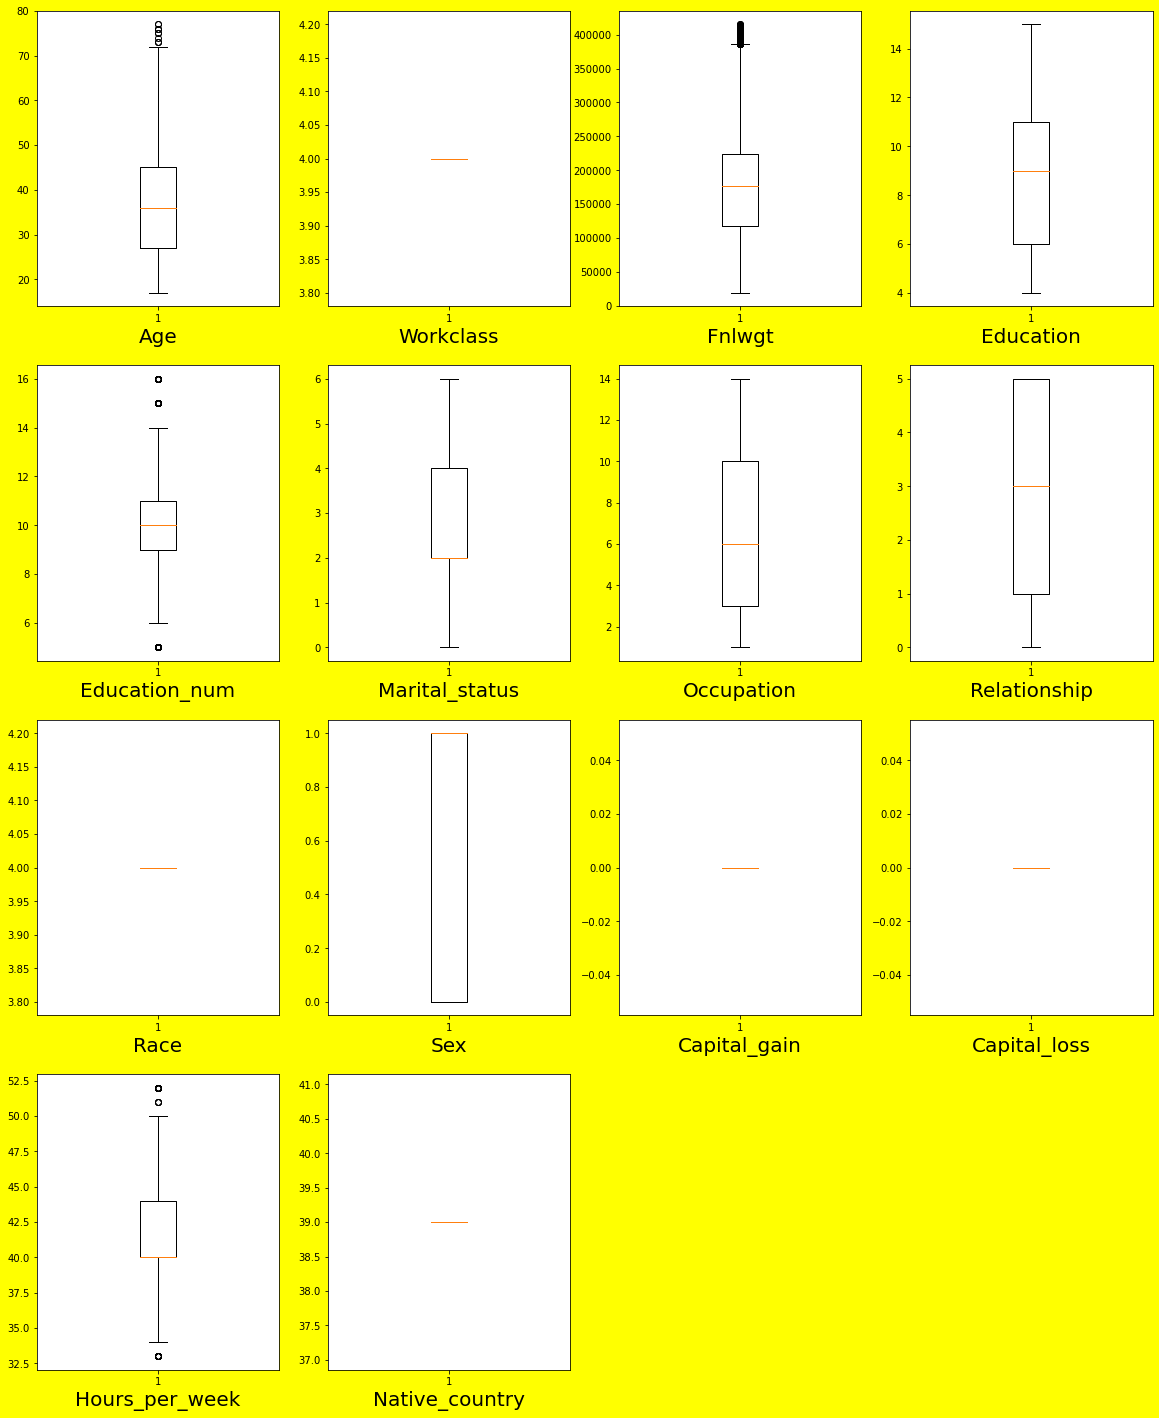

In [138]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for column in X1:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        plt.boxplot(X1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [139]:
# a lot of outliers have removed from dataset

In [140]:
# also checking dataset by distribution plot again

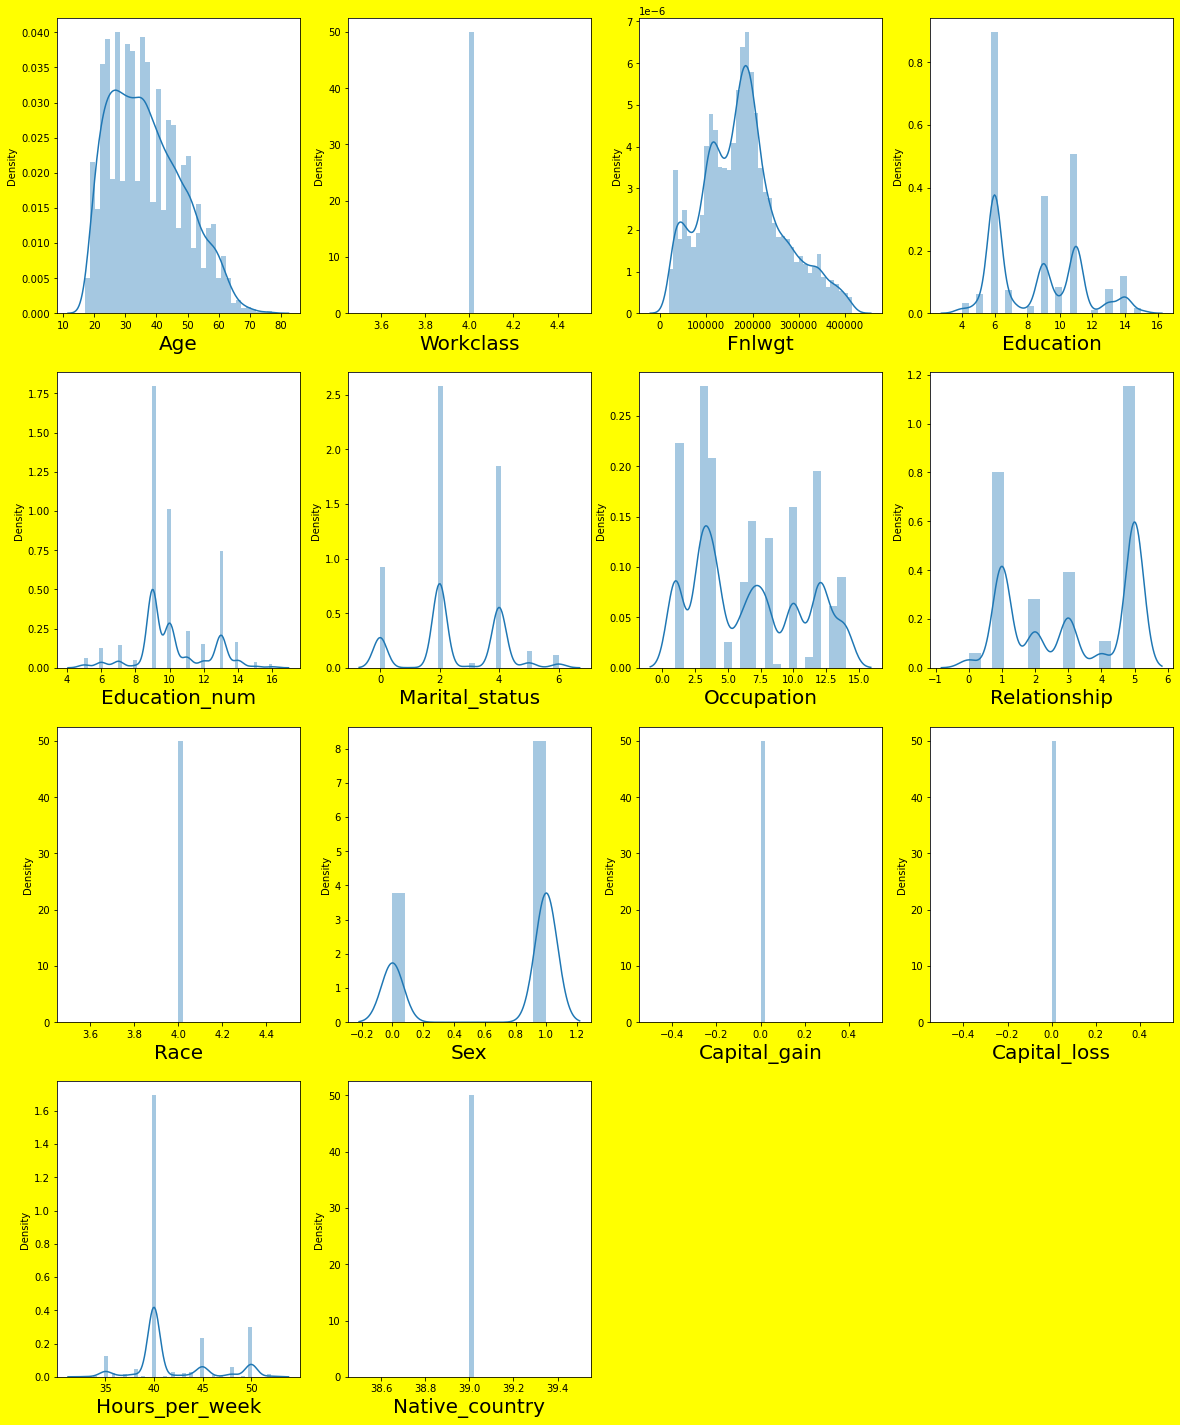

In [141]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for column in X1:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [142]:
# now plot heatmap for checking the multicollinearity problem

In [143]:
corr = df.corr().abs()

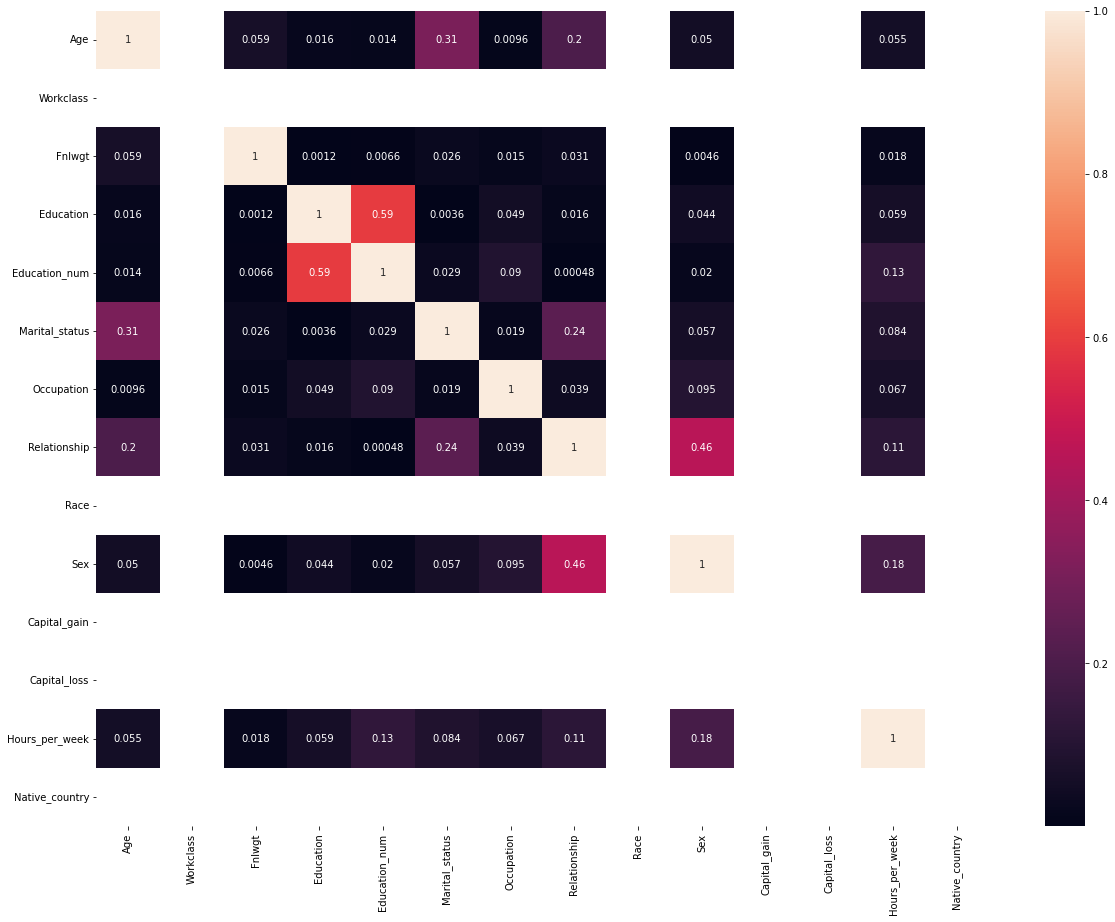

In [144]:
plt.figure(figsize=(20,15))

sns.heatmap(corr, annot=True)
plt.show()

In [145]:
# it seems that sex and population are much related to each other

In [146]:
# let's see by plotting scatter plot of sex and population and also will check for education and education_num

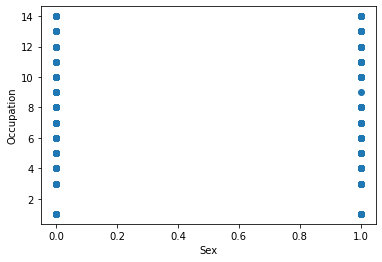

In [147]:
plt.scatter(df.Sex,df.Occupation)
plt.xlabel('Sex')
plt.ylabel('Occupation')

plt.show()

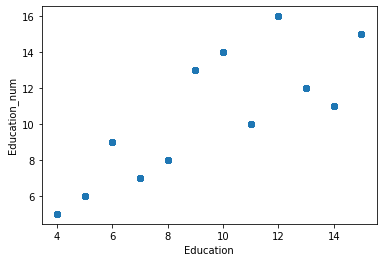

In [148]:
plt.scatter(df.Education,df.Education_num)
plt.xlabel('Education')
plt.ylabel('Education_num')

plt.show()

In [149]:
# yes sex and population are related 

In [150]:
# let's delete one column

In [151]:
# deleting sex column and again plot heatmap

In [152]:
df = df.drop(columns=['Sex'])


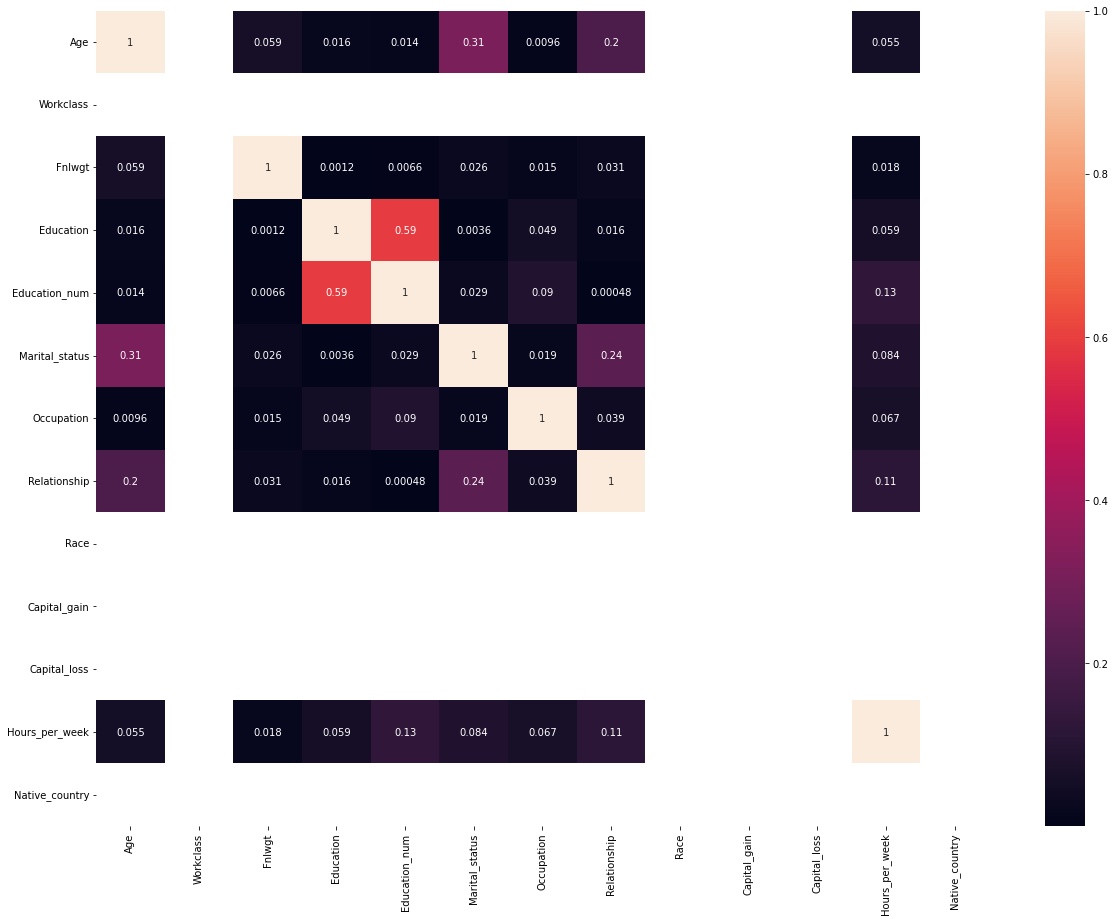

In [153]:
corr = df.corr().abs()

plt.figure(figsize=(20,15))

sns.heatmap(corr, annot=True)
plt.show()

In [154]:
# now it looks better than previous

In [155]:
# now split the dataset into two variables

# now dataset is ready for standardize and train test split

In [156]:
x = df.drop(columns=['Income'])
y = df['Income']

In [157]:
# import standard scaler and train test split

In [158]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [159]:
# standardize the data

In [160]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [161]:
# train test split

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=100)

In [163]:
# because it is a classification problem import some libraries for checking the score of model 

In [164]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [165]:
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score

In [166]:
# first model Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [169]:
lr_pred = lr.predict(x_test)

In [170]:
accuracy = accuracy_score(y_test,lr_pred)
accuracy

0.8233785269329424

In [171]:
conf_mat = confusion_matrix(y_test,lr_pred)
conf_mat

array([[2026,  114],
       [ 368,  221]], dtype=int64)

In [172]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.89      2140
        >50K       0.66      0.38      0.48       589

    accuracy                           0.82      2729
   macro avg       0.75      0.66      0.69      2729
weighted avg       0.81      0.82      0.80      2729



In [173]:
# second model Decision Tree

In [174]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [176]:
dt_pred = dt.predict(x_test)

In [177]:
accuracy = accuracy_score(y_test,dt_pred)
accuracy

0.7816049835104434

In [178]:
conf_mat = confusion_matrix(y_test,dt_pred)
conf_mat

array([[1839,  301],
       [ 295,  294]], dtype=int64)

In [179]:
(1866 + 287)/(1866 + 274 + 302 + 287)

0.788933675338952

In [180]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.86      0.86      2140
        >50K       0.49      0.50      0.50       589

    accuracy                           0.78      2729
   macro avg       0.68      0.68      0.68      2729
weighted avg       0.78      0.78      0.78      2729



In [181]:
#third model Random Forest

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [184]:
rf_pred = rf.predict(x_test)

In [185]:
accuracy = accuracy_score(y_test,rf_pred)
accuracy

0.8226456577500916

In [186]:
conf_mat = confusion_matrix(y_test,rf_pred)
conf_mat

array([[1972,  168],
       [ 316,  273]], dtype=int64)

In [187]:
(1972 + 263)/(1972 + 168 + 326 + 263)

0.8189813118358373

In [188]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      2140
        >50K       0.62      0.46      0.53       589

    accuracy                           0.82      2729
   macro avg       0.74      0.69      0.71      2729
weighted avg       0.81      0.82      0.81      2729



In [189]:
# fourth model SVM

In [190]:
from sklearn.svm import SVC

In [191]:
svc = SVC()

svc.fit(x_train,y_train)

SVC()

In [192]:
svc_pred = svc.predict(x_test)

In [193]:
accuracy = accuracy_score(y_test,svc_pred)
accuracy

0.8299743495786002

In [194]:
conf_mat = confusion_matrix(y_test,svc_pred)
conf_mat

array([[2051,   89],
       [ 375,  214]], dtype=int64)

In [195]:
(2051 + 214)/(2051 + 89 + 375 + 214)

0.8299743495786002

In [196]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.96      0.90      2140
        >50K       0.71      0.36      0.48       589

    accuracy                           0.83      2729
   macro avg       0.78      0.66      0.69      2729
weighted avg       0.82      0.83      0.81      2729



In [197]:
# compare all four models how all they perform

In [198]:
# first check on training data

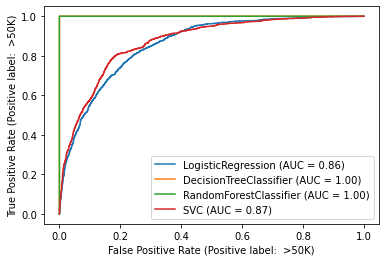

In [199]:
disp = plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)

plt.show()

In [200]:
# now check all models on test data 

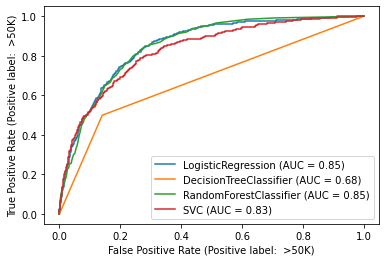

In [201]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plt.show()

In [202]:
# all models's performance is here

# now we can consider Random Forest or SVM both are performimg well

In [203]:
# saving model Random Forest

In [204]:
import pickle

In [205]:
pickle.dump(rf,open('rf_cl_Census','wb'))